In [4]:
# install PySpark
!pip install pyspark

In [5]:
# Import SparkSession from PySpark
from pyspark.sql import SparkSession

# initialize pyspark session
spark = SparkSession.builder.appName('Retail Sales Analysis').getOrCreate()

In [6]:
# read retail dataset
df = spark.read.csv('retail_sales_dataset.csv', header=True, inferSchema=True)

# show top 5
df.show(5)

+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|Transaction ID|      Date|Customer ID|Gender|Age|Product Category|Quantity|Price per Unit|Total Amount|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|             1|2023-11-24|    CUST001|  Male| 34|          Beauty|       3|            50|         150|
|             2|2023-02-27|    CUST002|Female| 26|        Clothing|       2|           500|        1000|
|             3|2023-01-13|    CUST003|  Male| 50|     Electronics|       1|            30|          30|
|             4|2023-05-21|    CUST004|  Male| 37|        Clothing|       1|           500|         500|
|             5|2023-05-06|    CUST005|  Male| 30|          Beauty|       2|            50|         100|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
only showing top 5 rows



In [7]:
# calculate the total of dataset
df.count()

1000

In [8]:
# displays the data schema
df.printSchema()

root
 |-- Transaction ID: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price per Unit: integer (nullable = true)
 |-- Total Amount: integer (nullable = true)



In [9]:
# descriptive statistics
df.describe().show()

+-------+-----------------+-----------+------+------------------+----------------+------------------+------------------+-----------------+
|summary|   Transaction ID|Customer ID|Gender|               Age|Product Category|          Quantity|    Price per Unit|     Total Amount|
+-------+-----------------+-----------+------+------------------+----------------+------------------+------------------+-----------------+
|  count|             1000|       1000|  1000|              1000|            1000|              1000|              1000|             1000|
|   mean|            500.5|       NULL|  NULL|            41.392|            NULL|             2.514|            179.89|            456.0|
| stddev|288.8194360957494|       NULL|  NULL|13.681429659122518|            NULL|1.1327343409145354|189.68135627129234|559.9976315551235|
|    min|                1|    CUST001|Female|                18|          Beauty|                 1|                25|               25|
|    max|             1000|

In [10]:
df = df.dropna()  # drop null value
df = df.dropDuplicates()  # drop duplicated value

In [11]:
# check the total dataset again after data cleaning
df.count()

1000

In [12]:
# import some library
from pyspark.sql.functions import month, year, col

# calculates monthly sales
monthly_sales = df.groupBy(year('date').alias('year'), month('date').alias('month')).sum('Total Amount').orderBy('year', 'month')

# show the result
monthly_sales.show()

+----+-----+-----------------+
|year|month|sum(Total Amount)|
+----+-----+-----------------+
|2023|    1|            35450|
|2023|    2|            44060|
|2023|    3|            28990|
|2023|    4|            33870|
|2023|    5|            53150|
|2023|    6|            36715|
|2023|    7|            35465|
|2023|    8|            36960|
|2023|    9|            23620|
|2023|   10|            46580|
|2023|   11|            34920|
|2023|   12|            44690|
|2024|    1|             1530|
+----+-----+-----------------+



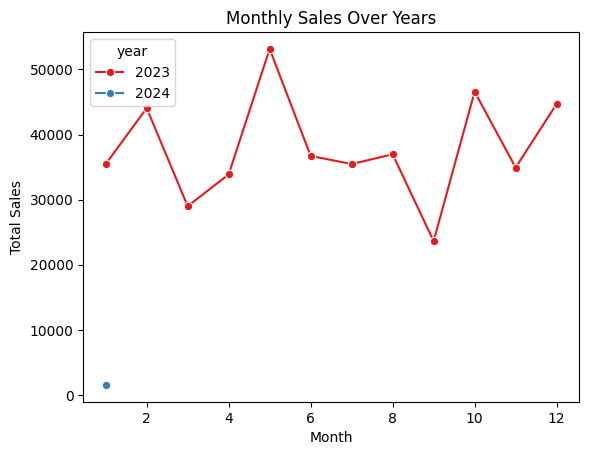

In [13]:
# import some library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# convert to pandas dataframe
monthly_sales_pd = monthly_sales.toPandas()

# plotting
sns.lineplot(data=monthly_sales_pd, x='month', y='sum(Total Amount)', hue='year', palette='Set1', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Years')
plt.show()

In [14]:
# calculates the best-selling products based on the number sold
top_products = df.groupBy('Product Category').sum('Quantity').orderBy(col('sum(Quantity)').desc())

# show the result
top_products.show()

+----------------+-------------+
|Product Category|sum(Quantity)|
+----------------+-------------+
|        Clothing|          894|
|     Electronics|          849|
|          Beauty|          771|
+----------------+-------------+



<ipython-input-15-b74448828d64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='sum(Quantity)', data=top_products_pd, palette='viridis')


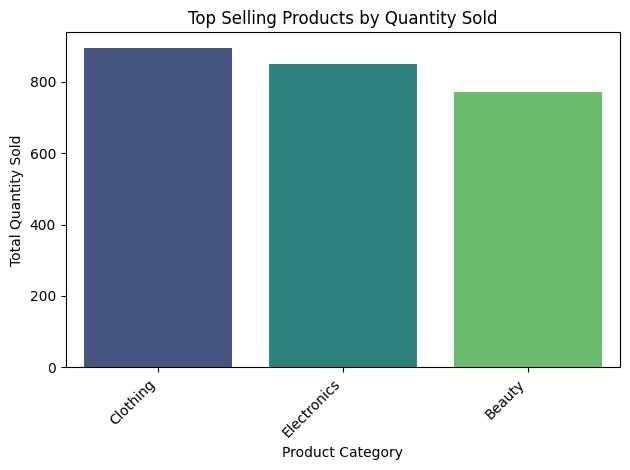

In [15]:
# convert to pandas dataframe
top_products_pd = top_products.toPandas()

# Plot bar
sns.barplot(x='Product Category', y='sum(Quantity)', data=top_products_pd, palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Products by Quantity Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:
# import some library
from pyspark.sql.functions import sum, avg, count

# calculate spending by gender
gender_spending = df.groupBy('Gender').agg(
    sum('Total Amount').alias('Total Spending'),
    avg('Total Amount').alias('Average Spending'),
    count('Gender').alias('Number of Transactions')
)

# show the result
gender_spending.show()

+------+--------------+------------------+----------------------+
|Gender|Total Spending|  Average Spending|Number of Transactions|
+------+--------------+------------------+----------------------+
|Female|        232840|456.54901960784315|                   510|
|  Male|        223160|455.42857142857144|                   490|
+------+--------------+------------------+----------------------+



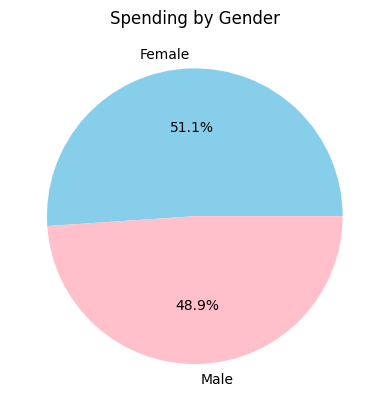

In [17]:
# calculate spending (sum) by gender
gender_spending_sum = df.groupBy('Gender').agg(sum('Total Amount').alias('Total Spending'))

# convert to pandas dataframe
gender_spending_sum_pd = gender_spending_sum.toPandas()

# pie plot
plt.pie(data=gender_spending_sum_pd, x='Total Spending', labels=gender_spending_sum_pd['Gender'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Spending by Gender')
plt.show()

In [18]:
df.show(1)

+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|Transaction ID|      Date|Customer ID|Gender|Age|Product Category|Quantity|Price per Unit|Total Amount|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|            33|2023-03-23|    CUST033|Female| 50|     Electronics|       2|            50|         100|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
only showing top 1 row



In [19]:
# import library
from pyspark.ml.feature import StringIndexer

# create a StringIndexer for each categorical column
gender_indexer = StringIndexer(inputCol='Gender', outputCol='GenderIndex')
product_indexer = StringIndexer(inputCol='Product Category', outputCol='ProductCategoryIndex')

# apply the indexer to the DataFrame
df_indexed = gender_indexer.fit(df).transform(df)
df_indexed = product_indexer.fit(df_indexed).transform(df_indexed)

In [20]:
# import some library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# combine the required features into one feature vector
assembler = VectorAssembler(inputCols=['GenderIndex', 'ProductCategoryIndex', 'Quantity', 'Price per Unit'],
                            outputCol='features')

# data transformation to use assembler
df_featured = assembler.transform(df_indexed)

# split data to train and test
train_data, test_data = df_featured.randomSplit([0.8, 0.2])

In [21]:
# initialize the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='Total Amount')

# train the model using training data
lr_model = lr.fit(train_data)

# make predictions using test data
predictions = lr_model.transform(test_data)

# displays several prediction results
predictions.select('Total Amount', 'prediction', 'features').show(5)

+------------+------------------+-------------------+
|Total Amount|        prediction|           features|
+------------+------------------+-------------------+
|         100| 346.4986050102721| [1.0,1.0,4.0,25.0]|
|          75|160.48614760535435| [1.0,2.0,3.0,25.0]|
|        2000|1508.3551189563168|[0.0,1.0,4.0,500.0]|
|          50|-30.05602379144318| [0.0,1.0,2.0,25.0]|
|         500| 961.9760012608585|[0.0,2.0,1.0,500.0]|
+------------+------------------+-------------------+
only showing top 5 rows



In [22]:
# use evaluators to evaluate model performance
evaluator = RegressionEvaluator(labelCol='Total Amount', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)

print(f'Root Mean Squared Error (r2) on test data: {r2}')

Root Mean Squared Error (r2) on test data: 0.8710968126156169


In [23]:
# close SparkSession
spark.stop()